In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Starting with 2025 provider data

In [2]:
IRF_provider_data_June_25 = pd.read_csv('../data/Inpatient_Rehabilitation_Facility_Provider_Data_Jun2025.csv')
IRF_provider_data_June_25

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_CI_LOWER,0.821,-,7/1/2023,6/30/2024,-
1,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_CI_UPPER,4.213,-,7/1/2023,6/30/2024,-
2,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_COMP_PERF,No Different than the National Benchmark,-,7/1/2023,6/30/2024,-
3,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_DOPC_DAYS,"2,743",-,7/1/2023,6/30/2024,-
4,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_ELIGCASES,2.962,-,7/1/2023,6/30/2024,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83295,743031,HORIZON MEDICAL CENTER OF MCKINNEY LLC,6601 W UNIVERSITY DRIVE,-,MC KINNEY,TX,75071,Collin,(469) 907-1355,6,I_025_02_NUMERATOR,Not Available,2,10/1/2023,9/30/2024,-
83296,743031,HORIZON MEDICAL CENTER OF MCKINNEY LLC,6601 W UNIVERSITY DRIVE,-,MC KINNEY,TX,75071,Collin,(469) 907-1355,6,I_025_02_OBS_RATE,Not Available,2,10/1/2023,9/30/2024,-
83297,743031,HORIZON MEDICAL CENTER OF MCKINNEY LLC,6601 W UNIVERSITY DRIVE,-,MC KINNEY,TX,75071,Collin,(469) 907-1355,6,I_026_01_DENOMINATOR,Not Available,2,10/1/2023,9/30/2024,-
83298,743031,HORIZON MEDICAL CENTER OF MCKINNEY LLC,6601 W UNIVERSITY DRIVE,-,MC KINNEY,TX,75071,Collin,(469) 907-1355,6,I_026_01_NUMERATOR,Not Available,2,10/1/2023,9/30/2024,-


In [3]:
IRF_provider_data_June_25.info()
#dates, score are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83300 entries, 0 to 83299
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CMS Certification Number (CCN)  83300 non-null  object
 1   Provider Name                   83300 non-null  object
 2   Address Line 1                  83300 non-null  object
 3   Address Line 2                  83300 non-null  object
 4   City/Town                       83300 non-null  object
 5   State                           83300 non-null  object
 6   ZIP Code                        83300 non-null  int64 
 7   County/Parish                   83300 non-null  object
 8   Telephone Number                83300 non-null  object
 9   CMS Region                      83300 non-null  int64 
 10  Measure Code                    83300 non-null  object
 11  Score                           83300 non-null  object
 12  Footnote                        83300 non-null

#### Converting Start Date and End Date to datetime formats

In [4]:
IRF_provider_data_June_25['Start Date']=pd.to_datetime(IRF_provider_data_June_25['Start Date'], format =  '%m/%d/%Y')
IRF_provider_data_June_25.head(1)

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_CI_LOWER,0.821,-,2023-07-01,6/30/2024,-


In [5]:
IRF_provider_data_June_25['End Date']=pd.to_datetime(IRF_provider_data_June_25['End Date'], format =  '%m/%d/%Y')
IRF_provider_data_June_25.head(1)

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_CI_LOWER,0.821,-,2023-07-01,2024-06-30,-


extracting out just MSPB_SCORE

In [6]:
MSPB_SCORE_June_25= IRF_provider_data_June_25.loc[IRF_provider_data_June_25['Measure Code']=='I_020_01_MSPB_SCORE'].reset_index(drop=True)
MSPB_SCORE_June_25

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_020_01_MSPB_SCORE,0.99,-,2021-10-01,2023-09-30,-
1,13028,ENCOMPASS REHABILITATION HOSPITAL OF MONTGOMERY,4465 NARROW LANE RD,-,MONTGOMERY,AL,36116,Montgomery,(334) 284-7821,4,I_020_01_MSPB_SCORE,1,-,2021-10-01,2023-09-30,-
2,13029,ENCOMPASS HEALTH REHABILITATION HOSPITAL NORTH...,1490 HIGHWAY 72 E,-,HUNTSVILLE,AL,35811,Madison,(205) 535-2300,4,I_020_01_MSPB_SCORE,0.93,-,2021-10-01,2023-09-30,-
3,13030,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF DO...,1736 EAST MAIN STREET,-,DOTHAN,AL,36301,Houston,(334) 712-6333,4,I_020_01_MSPB_SCORE,1.01,-,2021-10-01,2023-09-30,-
4,13031,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF SH...,900 OAK MOUNTAIN COMMONS LANE,-,PELHAM,AL,35124,Shelby,(205) 216-7621,4,I_020_01_MSPB_SCORE,1,-,2021-10-01,2023-09-30,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,743025,REHABILITATION INSTITUTE OF SOUTH SAN ANTONIO,12011 S E LOOP 410,-,SAN ANTONIO,TX,78221,Bexar,(469) 713-1145,6,I_020_01_MSPB_SCORE,Not Available,5,2021-10-01,2023-09-30,-
1221,743027,CLEARSKY REHABILITATION HOSPITAL OF BAYTOWN LLC,150 BLUE HERON PKWY,-,BAYTOWN,TX,77521,Harris,(281) 724-5442,6,I_020_01_MSPB_SCORE,Not Available,5,2021-10-01,2023-09-30,-
1222,743028,EXALT HEALTH REHABILITATION HOSPITAL CONROE,2507 SOUTH LOOP 336 W,-,CONROE,TX,77304,Montgomery,(936) 380-8340,6,I_020_01_MSPB_SCORE,Not Available,5,2021-10-01,2023-09-30,-
1223,743030,ENCOMPASS HEALTH REHABILITATION OF HOUSTON AT THE,3010 YELLOWSTONE BLVD,-,HOUSTON,TX,77054,Harris,(832) 380-7200,6,I_020_01_MSPB_SCORE,Not Available,5,2021-10-01,2023-09-30,-


Drop rows where score is "Not Available"

In [7]:
rows_to_drop = MSPB_SCORE_June_25['Score'].loc[MSPB_SCORE_June_25['Score']=='Not Available']
rows_to_drop

8       Not Available
34      Not Available
35      Not Available
37      Not Available
42      Not Available
            ...      
1220    Not Available
1221    Not Available
1222    Not Available
1223    Not Available
1224    Not Available
Name: Score, Length: 141, dtype: object

In [8]:
MSPB_SCORE_June_25_cleaned=MSPB_SCORE_June_25.drop(rows_to_drop.index, axis=0).reset_index(drop=True)
MSPB_SCORE_June_25_cleaned.head(1)

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_020_01_MSPB_SCORE,0.99,-,2021-10-01,2023-09-30,-


In [9]:
MSPB_SCORE_June_25_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CMS Certification Number (CCN)  1084 non-null   object        
 1   Provider Name                   1084 non-null   object        
 2   Address Line 1                  1084 non-null   object        
 3   Address Line 2                  1084 non-null   object        
 4   City/Town                       1084 non-null   object        
 5   State                           1084 non-null   object        
 6   ZIP Code                        1084 non-null   int64         
 7   County/Parish                   1084 non-null   object        
 8   Telephone Number                1084 non-null   object        
 9   CMS Region                      1084 non-null   int64         
 10  Measure Code                    1084 non-null   object        
 11  Scor

In [10]:
MSPB_SCORE_June_25_cleaned['Score']=MSPB_SCORE_June_25_cleaned['Score'].astype(str).astype(float)

In [11]:
MSPB_SCORE_June_25_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CMS Certification Number (CCN)  1084 non-null   object        
 1   Provider Name                   1084 non-null   object        
 2   Address Line 1                  1084 non-null   object        
 3   Address Line 2                  1084 non-null   object        
 4   City/Town                       1084 non-null   object        
 5   State                           1084 non-null   object        
 6   ZIP Code                        1084 non-null   int64         
 7   County/Parish                   1084 non-null   object        
 8   Telephone Number                1084 non-null   object        
 9   CMS Region                      1084 non-null   int64         
 10  Measure Code                    1084 non-null   object        
 11  Scor

In [12]:
Avg_MSPB_25 = MSPB_SCORE_June_25_cleaned.groupby('CMS Region')['Score'].mean().to_frame()

In [13]:
#Avg_MSPB_25=Avg_MSPB_25.to_frame()

In [14]:
Avg_MSPB_25=Avg_MSPB_25.rename(columns={'Score':'Score_2025'})
Avg_MSPB_25

,Score_2025
CMS Region,
1,0.990000
2,1.027241
3,0.987524
4,0.996140
5,0.974426
6,1.016860
7,0.934079
8,0.957209
9,1.006311


Text(0.5, 1.0, 'Avg MSPB by CMS Region 2025')

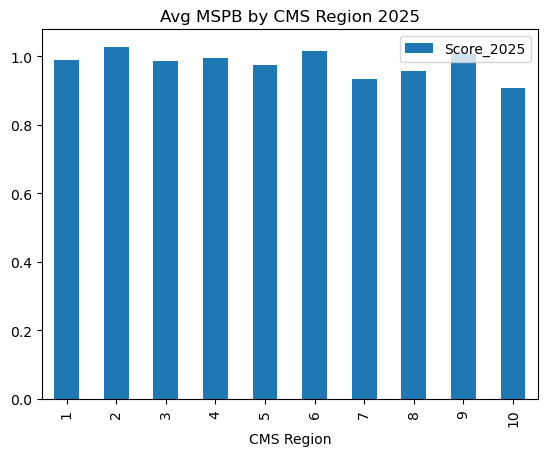

In [15]:
Avg_MSPB_25.plot(kind='bar')

plt.title('Avg MSPB by CMS Region 2025')

#### Now importing National Data

In [16]:
National_Data_25= pd.read_csv('../data/Inpatient_Rehabilitation_Facility_National_Data_Jun2025.csv')

In [17]:
National_Data_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CMS Certification Number (CCN)  28 non-null     object
 1   Measure Code                    28 non-null     object
 2   Score                           28 non-null     object
 3   Footnote                        28 non-null     object
 4   Start Date                      28 non-null     object
 5   End Date                        28 non-null     object
 6   Measure Date Range              28 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


In [18]:
rows_to_drop = National_Data_25['Score'].loc[National_Data_25['Score']=='Not Available']

In [19]:
National_Data_25=National_Data_25.drop(rows_to_drop.index, axis=0).reset_index(drop=True)

In [20]:
National_Data_25= National_Data_25.loc[National_Data_25['Measure Code']=='I_020_01_NATL_MSPB_SCORE'].reset_index(drop=True)
National_Data_25

,CMS Certification Number (CCN),Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,NATION,I_020_01_NATL_MSPB_SCORE,1,-,10/1/2021,9/30/2023,-


## Looking at 2024 Provider Data next

In [21]:
IRF_provider_data_June_24 = pd.read_csv('../data/Inpatient_Rehabilitation_Facility-Provider_Data_Jun2024.csv')
IRF_provider_data_June_24.head()

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_CI_LOWER,0.773,-,07/01/2022,06/30/2023,-
1,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_CI_UPPER,3.964,-,07/01/2022,06/30/2023,-
2,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_COMP_PERF,No Different than the National Benchmark,-,07/01/2022,06/30/2023,-
3,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_DOPC_DAYS,"2,914",-,07/01/2022,06/30/2023,-
4,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_ELIGCASES,3.148,-,07/01/2022,06/30/2023,-


Filtering to MSPB score

In [22]:
MSPB_score_June24= IRF_provider_data_June_24.loc[IRF_provider_data_June_24['Measure Code']== 'I_020_01_MSPB_SCORE'].reset_index(drop=True)
MSPB_score_June24

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_020_01_MSPB_SCORE,0.99,-,10/01/2020,09/30/2022,-
1,013028,ENCOMPASS REHABILITATION HOSPITAL OF MONTGOMERY,4465 NARROW LANE RD,-,MONTGOMERY,AL,36116,Montgomery,(334) 284-7821,4,I_020_01_MSPB_SCORE,1.00,-,10/01/2020,09/30/2022,-
2,013029,ENCOMPASS HEALTH REHABILITATION HOSPITAL NORTH...,1490 HIGHWAY 72 E,-,HUNTSVILLE,AL,35811,Madison,(205) 535-2300,4,I_020_01_MSPB_SCORE,0.93,-,10/01/2020,09/30/2022,-
3,013030,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF DO...,1736 EAST MAIN STREET,-,DOTHAN,AL,36301,Houston,(334) 712-6333,4,I_020_01_MSPB_SCORE,1.02,-,10/01/2020,09/30/2022,-
4,013031,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF SH...,900 OAK MOUNTAIN COMMONS LANE,-,PELHAM,AL,35124,Shelby,(205) 216-7621,4,I_020_01_MSPB_SCORE,1.02,-,10/01/2020,09/30/2022,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,67T055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,-,SAN ANTONIO,TX,78258,Bexar,(210) 439-3635,6,I_020_01_MSPB_SCORE,1.03,-,10/01/2020,09/30/2022,-
1209,713025,NORTH SHORE REHABILITATION HOSPITAL,"64030 HWY 434, 1ST AND 2ND FLOOR OF THE TOWER",-,LACOMBE,LA,70445,St. Tammany,(985) 218-4660,6,I_020_01_MSPB_SCORE,0.95,-,10/01/2020,09/30/2022,-
1210,713026,BOGALUSA REHABILITATION HOSPITAL,621 COLUMBIA STREET,-,BOGALUSA,LA,70427,WASHINGTON,(337) 254-4535,6,I_020_01_MSPB_SCORE,1.25,-,10/01/2020,09/30/2022,-
1211,713028,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF SH...,8650 MILLICENT WAY,-,SHREVEPORT,LA,71115,Caddo,(318) 642-8100,6,I_020_01_MSPB_SCORE,1.04,-,10/01/2020,09/30/2022,-


In [23]:
rows_to_drop = MSPB_score_June24['Score'].loc[MSPB_score_June24['Score']=='Not Available']
rows_to_drop

34      Not Available
35      Not Available
36      Not Available
38      Not Available
43      Not Available
            ...      
1203    Not Available
1204    Not Available
1205    Not Available
1206    Not Available
1207    Not Available
Name: Score, Length: 151, dtype: object

In [24]:
MSPB_score_June24=MSPB_score_June24.drop(rows_to_drop.index, axis=0).reset_index(drop=True)

In [25]:
MSPB_score_June24['Score']=MSPB_score_June24['Score'].astype(str).astype(float)

In [26]:
Avg_MSPB_24= MSPB_score_June24.groupby('CMS Region')['Score'].mean()


In [27]:
Avg_MSPB_24=Avg_MSPB_24.to_frame()

In [28]:
Avg_MSPB_24=Avg_MSPB_24.rename(columns={'Score':'Score_2024'})
Avg_MSPB_24

,Score_2024
CMS Region,
1,0.992424
2,1.060000
3,0.980857
4,0.985124
5,0.977486
6,1.016891
7,0.941806
8,0.964419
9,1.010392


## Looking at 2023 Data:

In [29]:
IRF_provider_data_June_23 = pd.read_csv('../data/Inpatient_Rehabilitation_Facility-Provider_Data_Jun2023.csv')
IRF_provider_data_June_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81668 entries, 0 to 81667
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CMS Certification Number (CCN)  81668 non-null  object
 1   Facility Name                   81668 non-null  object
 2   Address Line 1                  81668 non-null  object
 3   Address Line 2                  81668 non-null  object
 4   City                            81668 non-null  object
 5   State                           81668 non-null  object
 6   Zip Code                        81668 non-null  int64 
 7   County Name                     81668 non-null  object
 8   Phone Number                    81668 non-null  object
 9   CMS Region                      81668 non-null  int64 
 10  Measure Code                    81668 non-null  object
 11  Score                           81668 non-null  object
 12  Footnote                        81668 non-null

In [30]:
MSPB_score_June23= IRF_provider_data_June_23.loc[IRF_provider_data_June_23['Measure Code']== 'I_020_01_MSPB_SCORE'].reset_index(drop=True)


In [31]:
rows_to_drop = MSPB_score_June23['Score'].loc[MSPB_score_June23['Score']=='Not Available']

In [32]:
MSPB_score_June23=MSPB_score_June23.drop(rows_to_drop.index, axis=0).reset_index(drop=True)

In [33]:
MSPB_score_June23['Score']=MSPB_score_June23['Score'].astype(str).astype(float)

In [34]:
MSPB_score_June23

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,Phone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_020_01_MSPB_SCORE,1.02,-,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1,013028,ENCOMPASS REHABILITATION HOSPITAL OF MONTGOMERY,4465 NARROW LANE RD,-,MONTGOMERY,AL,36116,Montgomery,(334) 284-7821,4,I_020_01_MSPB_SCORE,0.99,-,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
2,013029,ENCOMPASS HEALTH REHABILITATION HOSPITAL NORTH...,1490 HIGHWAY 72 E,-,HUNTSVILLE,AL,35811,Madison,(205) 535-2300,4,I_020_01_MSPB_SCORE,0.93,-,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
3,013030,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF DO...,1736 EAST MAIN STREET,-,DOTHAN,AL,36301,Houston,(334) 712-6333,4,I_020_01_MSPB_SCORE,1.00,-,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
4,013031,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF SH...,900 OAK MOUNTAIN COMMONS LANE,-,PELHAM,AL,35124,Shelby,(205) 216-7621,4,I_020_01_MSPB_SCORE,1.02,-,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,673074,TEMPLE REHABILITATION HOSPITAL,23621 SE H.K. DODGEN LOOP,-,TEMPLE,TX,76504,Bell,(254) 410-0555,6,I_020_01_MSPB_SCORE,1.10,-,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1054,673075,PAM HEALTH REHABILITATION HOSPITAL OF EL PASO,1600 E CLIFF DR,-,EL PASO,TX,79902,El Paso,(915) 975-8630,6,I_020_01_MSPB_SCORE,1.01,-,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1055,67T055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,-,SAN ANTONIO,TX,78258,Bexar,(210) 439-3635,6,I_020_01_MSPB_SCORE,1.05,-,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1056,713025,NORTH SHORE REHABILITATION HOSPITAL,"64030 HWY 434, 1ST AND 2ND FLOOR OF THE TOWER",-,LACOMBE,LA,70445,St. Tammany,(985) 218-4660,6,I_020_01_MSPB_SCORE,0.96,-,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021


In [35]:
Avg_MSPB_23= MSPB_score_June23.groupby('CMS Region')['Score'].mean().to_frame()
Avg_MSPB_23

,Score
CMS Region,
1,1.010000
2,1.029194
3,0.988624
4,0.986768
5,0.976124
6,1.018298
7,0.946528
8,0.979474
9,1.006408


In [36]:
Avg_MSPB_23=Avg_MSPB_23.rename(columns={'Score':'Score_2023'})
Avg_MSPB_23

,Score_2023
CMS Region,
1,1.010000
2,1.029194
3,0.988624
4,0.986768
5,0.976124
6,1.018298
7,0.946528
8,0.979474
9,1.006408


## Looking at 2022 Data:

In [37]:
IRF_provider_data_June_22 = pd.read_csv('../data/Inpatient_Rehabilitation_Facility-Provider_Data_Jun2022.csv')

In [38]:
MSPB_Score_22=IRF_provider_data_June_22.loc[IRF_provider_data_June_22['Measure Code'] == 'I_020_01_MSPB_SCORE'].reset_index(drop=True)
MSPB_Score_22

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,Phone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_020_01_MSPB_SCORE,1.02,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1,013028,ENCOMPASS REHABILITATION HOSPITAL OF MONTGOMERY,4465 NARROW LANE RD,NaN,MONTGOMERY,AL,36116,Montgomery,(334) 284-7821,4,I_020_01_MSPB_SCORE,0.99,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
2,013029,ENCOMPASS HEALTH REHABILITATION HOSPITAL NORTH...,107 GOVERNORS DRIVE,NaN,HUNTSVILLE,AL,35801,Madison,(205) 535-2300,4,I_020_01_MSPB_SCORE,0.93,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
3,013030,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF DO...,1736 EAST MAIN STREET,NaN,DOTHAN,AL,36301,Houston,(334) 712-6333,4,I_020_01_MSPB_SCORE,1.00,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
4,013031,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF SH...,900 OAK MOUNTAIN COMMONS LANE,NaN,PELHAM,AL,35124,Shelby,(205) 216-7621,4,I_020_01_MSPB_SCORE,1.02,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,67T055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,NaN,SAN ANTONIO,TX,78258,Bexar,(210) 439-3635,6,I_020_01_MSPB_SCORE,1.05,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1192,713025,NORTH SHORE REHABILITATION HOSPITAL,"64030 HWY 434, 1ST AND 2ND FLOOR OF THE TOWER",NaN,LACOMBE,LA,70445,St. Tammany,(985) 218-4660,6,I_020_01_MSPB_SCORE,0.96,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1193,713026,BOGALUSA REHABILITATION HOSPITAL,621 COLUMBIA STREET,NaN,BOGALUSA,LA,70427,Washington,(337) 254-4535,6,I_020_01_MSPB_SCORE,1.43,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1194,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",NaN,LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,I_020_01_MSPB_SCORE,Not Available,2,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021


In [39]:
rows_to_drop=MSPB_Score_22.loc[MSPB_Score_22['Score']=='Not Available']

In [40]:
MSPB_Score_22=MSPB_Score_22.drop(rows_to_drop.index, axis=0).reset_index()

In [41]:
MSPB_Score_22['Score']=MSPB_Score_22['Score'].astype(str).astype(float)

In [42]:
MSPB_Score_22

,index,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,Phone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,0,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_020_01_MSPB_SCORE,1.02,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1,1,013028,ENCOMPASS REHABILITATION HOSPITAL OF MONTGOMERY,4465 NARROW LANE RD,NaN,MONTGOMERY,AL,36116,Montgomery,(334) 284-7821,4,I_020_01_MSPB_SCORE,0.99,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
2,2,013029,ENCOMPASS HEALTH REHABILITATION HOSPITAL NORTH...,107 GOVERNORS DRIVE,NaN,HUNTSVILLE,AL,35801,Madison,(205) 535-2300,4,I_020_01_MSPB_SCORE,0.93,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
3,3,013030,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF DO...,1736 EAST MAIN STREET,NaN,DOTHAN,AL,36301,Houston,(334) 712-6333,4,I_020_01_MSPB_SCORE,1.00,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
4,4,013031,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF SH...,900 OAK MOUNTAIN COMMONS LANE,NaN,PELHAM,AL,35124,Shelby,(205) 216-7621,4,I_020_01_MSPB_SCORE,1.02,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1185,673074,EVEREST REHABILITATION HOSPITAL TEMPLE,23621 SE H.K. DODGEN LOOP,NaN,TEMPLE,TX,76504,Bell,(254) 410-0555,6,I_020_01_MSPB_SCORE,1.10,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1080,1186,673075,PAM HEALTH REHABILITATION HOSPITAL OF EL PASO,1600 E CLIFF DR,NaN,EL PASO,TX,79902,El Paso,(915) 975-8630,6,I_020_01_MSPB_SCORE,1.01,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1081,1191,67T055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,NaN,SAN ANTONIO,TX,78258,Bexar,(210) 439-3635,6,I_020_01_MSPB_SCORE,1.05,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021
1082,1192,713025,NORTH SHORE REHABILITATION HOSPITAL,"64030 HWY 434, 1ST AND 2ND FLOOR OF THE TOWER",NaN,LACOMBE,LA,70445,St. Tammany,(985) 218-4660,6,I_020_01_MSPB_SCORE,0.96,NaN,07/01/2019,06/30/2021,07/01/2019 - 12/31/2019; 07/01/2020 - 06/30/2021


In [43]:
Avg_MSPB_22= MSPB_Score_22.groupby('CMS Region')['Score'].mean().to_frame()


In [44]:
Avg_MSPB_22=Avg_MSPB_22.rename(columns={'Score':'Score_2022'})
Avg_MSPB_22

,Score_2022
CMS Region,
1,1.008000
2,1.035397
3,0.989091
4,0.986965
5,0.976033
6,1.017615
7,0.945676
8,0.986410
9,1.005556


## Looking at 2020 Data:

In [45]:
IRF_provider_data_June_20 = pd.read_csv('../data/Inpatient Rehabilitation Facility-Provider Data_Jun2020.csv')

In [46]:
MSPB_Score_20=IRF_provider_data_June_20.loc[IRF_provider_data_June_20['Measure Code']=='I_020_01_MSPB_SCORE'].reset_index(drop=True)

In [47]:
rows_to_drop=MSPB_Score_20.loc[MSPB_Score_20['Score']== 'Not Available']

In [48]:
MSPB_Score_20=MSPB_Score_20.drop(rows_to_drop.index, axis=0).reset_index()

In [49]:
MSPB_Score_20['Score']=MSPB_Score_20['Score'].astype(str).astype(float)

In [50]:
Avg_MSPB_20= MSPB_Score_20.groupby('CMS Region')['Score'].mean().reset_index()

In [51]:
Avg_MSPB_20=Avg_MSPB_20.rename(columns={'Score':'Score_2020'})
Avg_MSPB_20

,CMS Region,Score_2020
0,1,1.044848
1,2,1.001094
2,3,1.012232
3,4,1.010464
4,5,0.980794
5,6,1.027909
6,7,0.967838
7,8,0.997500
8,9,1.004643
9,10,0.928710


#### Using a loop to merge all data frames together

In [52]:
dfs=[Avg_MSPB_20, Avg_MSPB_22, Avg_MSPB_23, Avg_MSPB_24, Avg_MSPB_25]

Avg_MSPB_Merged = dfs[0]

for i in range(1, len(dfs)):
    Avg_MSPB_Merged= pd.merge(Avg_MSPB_Merged, dfs[i], on = 'CMS Region', how ='inner')


Avg_MSPB_Merged

,CMS Region,Score_2020,Score_2022,Score_2023,Score_2024,Score_2025
0,1,1.044848,1.008000,1.010000,0.992424,0.990000
1,2,1.001094,1.035397,1.029194,1.060000,1.027241
2,3,1.012232,0.989091,0.988624,0.980857,0.987524
3,4,1.010464,0.986965,0.986768,0.985124,0.996140
4,5,0.980794,0.976033,0.976124,0.977486,0.974426
5,6,1.027909,1.017615,1.018298,1.016891,1.016860
6,7,0.967838,0.945676,0.946528,0.941806,0.934079
7,8,0.997500,0.986410,0.979474,0.964419,0.957209
8,9,1.004643,1.005556,1.006408,1.010392,1.006311
9,10,0.928710,0.912581,0.911379,0.917778,0.908400


Saving the data frame to CSV in effort to make a visualization in powerbi/excel

In [53]:
Avg_MSPB_Merged.to_csv('Avg_MSPB_Merged.csv', index=False)

## Drilling down to look at years 2024 and 2025

In [54]:
IRF_provider_data_June_25#.loc[IRF_provider_data_June_25['CMS Region']== 6]

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
0,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_CI_LOWER,0.821,-,2023-07-01,2024-06-30,-
1,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_CI_UPPER,4.213,-,2023-07-01,2024-06-30,-
2,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_COMP_PERF,No Different than the National Benchmark,-,2023-07-01,2024-06-30,-
3,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_DOPC_DAYS,"2,743",-,2023-07-01,2024-06-30,-
4,13025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,-,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,I_006_01_ELIGCASES,2.962,-,2023-07-01,2024-06-30,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83295,743031,HORIZON MEDICAL CENTER OF MCKINNEY LLC,6601 W UNIVERSITY DRIVE,-,MC KINNEY,TX,75071,Collin,(469) 907-1355,6,I_025_02_NUMERATOR,Not Available,2,2023-10-01,2024-09-30,-
83296,743031,HORIZON MEDICAL CENTER OF MCKINNEY LLC,6601 W UNIVERSITY DRIVE,-,MC KINNEY,TX,75071,Collin,(469) 907-1355,6,I_025_02_OBS_RATE,Not Available,2,2023-10-01,2024-09-30,-
83297,743031,HORIZON MEDICAL CENTER OF MCKINNEY LLC,6601 W UNIVERSITY DRIVE,-,MC KINNEY,TX,75071,Collin,(469) 907-1355,6,I_026_01_DENOMINATOR,Not Available,2,2023-10-01,2024-09-30,-
83298,743031,HORIZON MEDICAL CENTER OF MCKINNEY LLC,6601 W UNIVERSITY DRIVE,-,MC KINNEY,TX,75071,Collin,(469) 907-1355,6,I_026_01_NUMERATOR,Not Available,2,2023-10-01,2024-09-30,-


In [55]:
Region_Value_counts_25=IRF_provider_data_June_25['CMS Region'].value_counts()

In [56]:
Region_Value_counts_25=Region_Value_counts_25.to_frame()

In [57]:
 Region_Value_counts_25['percent_of_facilites']= Region_Value_counts_25['count']/Region_Value_counts_25['count'].sum()*100

In [58]:
Region_Value_counts_25.head(3)

,count,percent_of_facilites
CMS Region,,
6,18360,22.040816
4,17136,20.571429
5,14076,16.897959


In [59]:
Filtered_proivder_data_25=IRF_provider_data_June_25[['CMS Certification Number (CCN)','CMS Region','Measure Code','Score']]

In [60]:
Filtered_proivder_data_24=IRF_provider_data_June_24[['CMS Certification Number (CCN)','CMS Region','Measure Code','Score']]

In [61]:
Filtered_proivder_data_23=IRF_provider_data_June_23[['CMS Certification Number (CCN)','CMS Region','Measure Code','Score']]

In [62]:
Filtered_proivder_data_22=IRF_provider_data_June_22[['CMS Certification Number (CCN)','CMS Region','Measure Code','Score']]

In [63]:
Filtered_proivder_data_20=IRF_provider_data_June_20[['CMS Certification Number (CCN)','CMS Region','Measure Code','Score']]